In [1]:
#--- Code for loading the data set and pre-processing --->
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

normalisation

In [2]:
import sys
sys.path.append("/Users/zico5288/Desktop/INFR10069-2020-CW2-main/helpers")
from iaml01cw2_helpers import load_FashionMNIST
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST("/Users/zico5288/Desktop/INFR10069-2020-CW2-main/data/fashion")
import copy
Xtrn_orig = copy.deepcopy(Xtrn)
Xtst_orig = copy.deepcopy(Xtst)
from sklearn.decomposition import PCA
from sklearn.decomposition import *
from sklearn.svm import SVC
from matplotlib.pyplot import MultipleLocator
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
Xtrn = Xtrn_orig/255
Xtst = Xtst_orig/255
Xmean = np.mean(Xtrn, axis = 0)
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean

/Users/zico5288/opt/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


Q2.1

In [3]:
# Q2.1
def iaml01cw2_q2_1():
    reg = linear_model.LogisticRegression()
    reg.fit(Xtrn_nm, Ytrn)
    print('Accuracy: ',reg.score(Xtst_nm,Ytst))
    print('Confusion Matrix: \n',confusion_matrix(Ytst,reg.predict(Xtst_nm)))
iaml01cw2_q2_1()

Accuracy:  0.8401
Confusion Matrix: 
 [[819   3  15  50   7   4  89   1  12   0]
 [  5 953   4  27   5   0   3   1   2   0]
 [ 27   4 731  11 133   0  82   2   9   1]
 [ 31  15  14 866  33   0  37   0   4   0]
 [  0   3 115  38 760   2  72   0  10   0]
 [  2   0   0   1   0 911   0  56  10  20]
 [147   3 128  46 108   0 539   0  28   1]
 [  0   0   0   0   0  32   0 936   1  31]
 [  7   1   6  11   3   7  15   5 945   0]
 [  0   0   0   1   0  15   1  42   0 941]]


Q2.2

In [4]:
# Q2.2
def iaml01cw2_q2_2():
    svm = SVC()
    svm.fit(Xtrn_nm, Ytrn)
    print('Accuracy: ', svm.score(Xtst_nm,Ytst))
    print('Confusion Matrix: \n',confusion_matrix(Ytst,svm.predict(Xtst_nm)))
iaml01cw2_q2_2()

Accuracy:  0.8461
Confusion Matrix: 
 [[845   2   8  51   4   4  72   0  14   0]
 [  4 951   7  31   5   0   1   0   1   0]
 [ 15   2 748  11 137   0  79   0   8   0]
 [ 32   6  12 881  26   0  40   0   3   0]
 [  1   0  98  36 775   0  86   0   4   0]
 [  0   0   0   1   0 914   0  57   2  26]
 [185   1 122  39  95   0 533   0  25   0]
 [  0   0   0   0   0  34   0 925   0  41]
 [  3   1   8   5   2   4  13   4 959   1]
 [  0   0   0   0   0  22   0  47   1 930]]


Q2.3

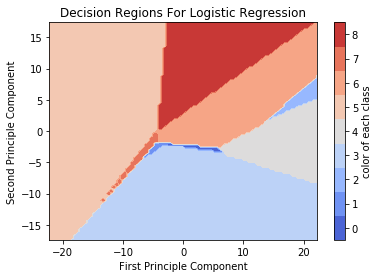

In [7]:
# Q2.3
def iaml01cw2_q2_3():
    pca = PCA(n_components=2)
    pca.fit(Xtrn_nm)
    aaa = pca.fit_transform(Xtrn_nm)
    sigma1 = np.std(aaa[:,0])
    sigma2 = np.std(aaa[:,1])
    plt.xlim((-5*sigma1,5*sigma1))
    plt.ylim((-5*sigma2,5*sigma2))
    n = 100
    x = np.linspace(-5*sigma1,5*sigma1,n)
    y = np.linspace(-5*sigma2,5*sigma2,n)
    X, Y = np.meshgrid(x, y)
    reg = linear_model.LogisticRegression()
    reg.fit(Xtrn_nm, Ytrn)
    result = np.empty([100,100])
    for i in range(100):
        for j in range(100):
            a = np.array([X[i,j], Y[i,j]])
            b = pca.inverse_transform(a)
            c = reg.predict(b.reshape(1,784))
            result[i,j] = c
    plt.contourf(X, Y,result,cmap='coolwarm',levels = np.arange(-1,9))
    cb = plt.colorbar()
    cb.set_ticks(np.arange(-0.5,9.5))
    cb.set_ticklabels(np.arange(0,9))
    cb.set_label('color of each class')
    plt.xlim((-5*sigma1,5*sigma1))
    plt.ylim((-5*sigma2,5*sigma2))
    plt.title('Decision Regions For Logistic Regression')
    plt.xlabel('First Principle Component')
    plt.ylabel('Second Principle Component')
    plt.savefig('2.3.pdf')
iaml01cw2_q2_3()

Q2.4

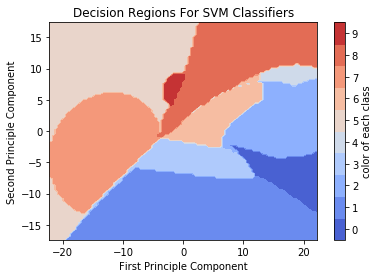

In [8]:
# Q2.4
def iaml01cw2_q2_4():
    pca = PCA(n_components=2)
    pca.fit(Xtrn_nm)
    aaa = pca.fit_transform(Xtrn_nm)
    sigma1 = np.std(aaa[:,0])
    sigma2 = np.std(aaa[:,1])
    plt.xlim((-5*sigma1,5*sigma1))
    plt.ylim((-5*sigma2,5*sigma2))
    n = 100
    x = np.linspace(-5*sigma1,5*sigma1,n)
    y = np.linspace(-5*sigma2,5*sigma2,n)
    X, Y = np.meshgrid(x, y)
    svm = SVC()
    svm.fit(Xtrn_nm, Ytrn)
    result = np.empty([100,100])
    for i in range(100):
        for j in range(100):
            a = np.array([X[i,j], Y[i,j]])
            b = pca.inverse_transform(a)
            c = svm.predict(b.reshape(1,784))
            result[i,j] = c
    plt.contourf(X,Y,result,cmap='coolwarm',levels = np.arange(-1,10))
    cb = plt.colorbar()
    cb.set_ticks(np.arange(-0.5,10.5))
    cb.set_ticklabels(np.arange(0,10))
    cb.set_label('color of each class')
    plt.title('Decision Regions For SVM Classifiers')
    plt.xlabel('First Principle Component')
    plt.ylabel('Second Principle Component')
    plt.savefig('2.4.pdf')
iaml01cw2_q2_4()

Q2.5

Accuracy:  [0.6481958  0.69109768 0.73670227 0.78380416 0.81970174 0.84470129
 0.85650231 0.8542039  0.8495031  0.84060138]
Highest accuracy:  0.8565023106939273
Optimal C:  21.544346900318846


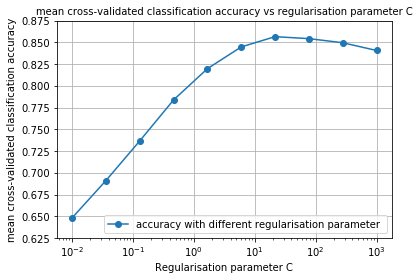

In [4]:
# Q2.5
def iaml01cw2_q2_5():
    from sklearn.model_selection import cross_val_score
    Xsmall = np.empty([0,784])
    Ysmall = np.empty([0,])
    for i in range(10):
        Xtrn_i = Xtrn_nm[Ytrn == i]
        Xsmall_i = Xtrn_i[0:1000,:]
        Ysmall_i = np.empty([1000,]) 
        for j in range(1000):
            Ysmall_i[j] = i
        Xsmall = np.concatenate((Xsmall,Xsmall_i),axis=0)
        Ysmall = np.concatenate((Ysmall,Ysmall_i),axis=0)
    log = np.logspace(-2,3,10)
    accuracy = np.empty([10])
    for i in range(len(log)):
        SVM = SVC(C=log[i])
        SVM.fit(Xsmall,Ysmall)
        accuracy[i] = np.mean(cross_val_score(SVM,Xsmall,Ysmall,cv=3,n_jobs=-1))
    print('Accuracy: ', accuracy)
    print('Highest accuracy: ', accuracy.max())
    print('Optimal C: ', log[accuracy.argmax()])
    plt.plot(log, accuracy,'o-',label ='accuracy with different regularisation parameter ')
    ax=plt.gca()
    ax.set_xscale('log')
    plt.title('mean cross-validated classification accuracy vs regularisation parameter C',size = 10)
    plt.xlabel('Regularisation parameter C',size = 10)
    plt.ylabel('mean cross-validated classification accuracy',size = 10)
    y_major_locator=MultipleLocator(0.025)
    ax.yaxis.set_major_locator(y_major_locator)
    plt.ylim((0.625,0.875))
    plt.grid()
    plt.legend()
    plt.savefig('2.5.pdf')
iaml01cw2_q2_5()

Q2.6

In [8]:
# Q2.6 
def iaml01cw2_q2_6():
    svm = SVC(C=2.15443469e+01)
    svm.fit(Xtrn_nm, Ytrn)
    print('Training Accuracy:', svm.score(Xtrn_nm,Ytrn))
    print('Test Accuracy: ', svm.score(Xtst_nm,Ytst))
iaml01cw2_q2_6()

Training Accuracy: 0.9084166666666667
Test Accuracy:  0.8765
